In [1]:
# %% Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading in ept75 Data
ept75 = "ept75"
sophie75df = pd.read_csv("Data/SOPHIE_{}_with_sizes.csv".format(ept75.upper()))
sophie75df["Date_UTC"] = pd.to_datetime(sophie75df["Date_UTC"])
# choosing only sophie onsets
sophie75onsetdf = sophie75df.iloc[np.where(sophie75df["Phase"] == 2)]
sophie75onsetdf = sophie75onsetdf.reset_index(drop=True)
# non-flagged onsets
sophie75noflagonsetdf = sophie75onsetdf.iloc[
    np.where(sophie75onsetdf["Flag"] == 0)
]
sophie75noflagonsetdf = sophie75noflagonsetdf.reset_index(drop=True)

# loading in ept80 Data
ept80 = "ept80"
sophie80df = pd.read_csv("Data/SOPHIE_{}_with_sizes.csv".format(ept80.upper()))
sophie80df["Date_UTC"] = pd.to_datetime(sophie80df["Date_UTC"])
# choosing only sophie onsets
sophie80onsetdf = sophie80df.iloc[np.where(sophie80df["Phase"] == 2)]
sophie80onsetdf = sophie80onsetdf.reset_index(drop=True)
# Non flagged onsets
sophie80noflagonsetdf = sophie80onsetdf.iloc[
    np.where(sophie80onsetdf["Flag"] == 0)
]
sophie80noflagonsetdf = sophie80noflagonsetdf.reset_index(drop=True)

# loading in ept90 Data
ept90 = "ept90"
sophie90df = pd.read_csv("Data/SOPHIE_{}_with_sizes.csv".format(ept90.upper()))
sophie90df["Date_UTC"] = pd.to_datetime(sophie90df["Date_UTC"])
# choosing only sophie onsets
sophie90onsetdf = sophie90df.iloc[np.where(sophie90df["Phase"] == 2)]
sophie90onsetdf = sophie90onsetdf.reset_index(drop=True)
# Non flagged onsets
sophie90noflagonsetdf = sophie90onsetdf.iloc[
    np.where(sophie90onsetdf["Flag"] == 0)
]
sophie90noflagonsetdf = sophie90noflagonsetdf.reset_index(drop=True)

# loading in newell and gjerloev onsets
newelldf = pd.read_csv(
    "Data/substorms-newell-20000101_000000_to_20070101_000000.csv"
)
newelldf["Date_UTC"] = pd.to_datetime(newelldf["Date_UTC"])
newelldf.drop(columns=["GLON", "GLAT"], inplace=True)

# loading in frey onsets
freydf = pd.read_csv(
    "Data/substorms-frey-20000101_000000_to_20070101_000000.csv"
)
freydf["Date_UTC"] = pd.to_datetime(freydf["Date_UTC"])
freydf.drop(columns=["GLON", "GLAT"], inplace=True)
# loading in IMAGE data
imagedf = pd.read_csv("Data/IMAGEtimes.csv")
imagedf["Date_UTC"] = pd.to_datetime(imagedf["Date_UTC"])

# loading in chu onsets
chudf = pd.read_csv("Data/ChuMPB.txt", header=None, names=["Date_UTC"])
chudf["Date_UTC"] = pd.to_datetime(
    chudf["Date_UTC"], format="%Y %m %d %H %M %S"
)

# loading in mcpherron and chu sml onsets
mcpsmldf = pd.read_fwf("Data/McPSML.txt")
mcpsmldf["Date_UTC"] = pd.to_datetime(
    mcpsmldf[["year", "mo", "da", "hr", "mn"]].astype(str).apply(" ".join, 1),
    format="%Y %m %d %H %M",
)
mcpsmldf.drop(["year", "mo", "da", "hr", "mn", "sc"], axis=1, inplace=True)
mcpsmldf = mcpsmldf[["Date_UTC", "baymin", "delbay", "hafwid"]]

# loading in mcpherron and chu mpb onsets
mcpmpbdf = pd.read_fwf("Data/McPMPB.txt")
mcpmpbdf.set_axis(
    ["Onset Time", "Max Time", "End Time", "Vons", "Vmax", "Vend", "Area"],
    axis=1,
    inplace=True,
)
mcpmpbdf = mcpmpbdf.drop(labels=0, axis=0)
mcpmpbdf["Onset Time"] = pd.to_datetime(
    mcpmpbdf["Onset Time"], format="%Y %m %d %H %M %S"
)
mcpmpbdf["Max Time"] = pd.to_datetime(
    mcpmpbdf["Max Time"], format="%Y %m %d %H %M %S"
)
mcpmpbdf["End Time"] = pd.to_datetime(
    mcpmpbdf["End Time"], format="%Y %m %d %H %M %S"
)
mcpmpbdf["Date_UTC"] = pd.to_datetime(
    mcpmpbdf["Onset Time"], format="%Y %m %d %H %M %S"
)
# loading in borovsky and yakymenko pi onsets
bypidf = pd.read_csv("Data/BYparticleinjections.csv")
bypidf["Date_UTC"] = pd.to_datetime(bypidf["Date_UTC"])

# loading in borovsky and yakymenko sml onsets
bysmldf = pd.read_csv("Data/BYSML.csv")
bysmldf["Date_UTC"] = pd.to_datetime(bysmldf["Date_UTC"])


In [2]:
# %% Function
def distribution_producer(array, name):

    starttime = pd.to_datetime("2000-05-18")
    stoptime = pd.to_datetime("2003-01-01")

    testarray = sophie80onsetdf["Date_UTC"]
    testarray = testarray[testarray.between(starttime, stoptime)].astype(
        np.int64
    )

    testarray2 = array["Date_UTC"]
    testarray2 = testarray2[testarray2.between(starttime, stoptime)].astype(
        np.int64
    )

    imagetimes = imagedf["Date_UTC"][
        imagedf["Date_UTC"].between(starttime, stoptime)
    ].astype(np.int64)

    freq = "30T"

    timestart = starttime

    mlat_binedges = np.arange(50, 86)
    mlt_binedges = np.arange(0, 24.25, 0.25)
    size_binedges = np.linspace(
        np.nanmin(np.abs(sophie80onsetdf["Delbay"])),
        1000,  # np.nanmax(np.abs(sophie80onsetdf["Delbay"])),
        51,
    )

    tp_mlat_table = np.empty((30, len(mlat_binedges) - 1), dtype=np.int64)
    tp_mlt_table = np.empty((30, len(mlt_binedges) - 1), dtype=np.int64)
    tp_size_table = np.empty((30, len(size_binedges) - 1), dtype=np.int64)

    fn_mlat_table = np.empty_like(tp_mlat_table)
    fn_mlt_table = np.empty_like(tp_mlt_table)
    fn_size_table = np.empty_like(tp_size_table)

    for step in range(int(freq[:-1])):
        timestartloop = str(timestart + step * pd.Timedelta("1m"))
        # timestartloop = str(timestart)

        timestamps = pd.date_range(timestartloop, stoptime, freq=freq)
        timestamps = timestamps.astype(np.int64)

        windows_obs = np.digitize(testarray, timestamps)
        windows_fcast = np.digitize(testarray2, timestamps)
        imagewindows = np.digitize(imagetimes, timestamps)

        windows_obs = np.setdiff1d(windows_obs, len(timestamps))
        windows_fcast = np.setdiff1d(windows_fcast, len(timestamps))
        imagewindows = np.setdiff1d(imagewindows, len(timestamps))

        truepositives = np.intersect1d(windows_obs, windows_fcast)
        falsenegatives = np.setdiff1d(windows_obs, windows_fcast)

        if name == "Frey":
            falsenegatives = np.intersect1d(falsenegatives, imagewindows)

        # falsepositives = np.setdiff1d(windows_fcast, windows_obs)
        # truenegatives = np.setdiff1d(np.arange(1,len(timestamps)),np.union1d(windows_obs,windows_fcast))

        truepositivedf = pd.DataFrame(columns=sophie80onsetdf.columns)
        for tp in truepositives:
            x = sophie80onsetdf[
                sophie80onsetdf["Date_UTC"].between(
                    pd.to_datetime(timestamps[tp - 1]),
                    pd.to_datetime(timestamps[tp]),
                )
            ]
            truepositivedf = pd.concat([truepositivedf, x])
        truepositivedf = truepositivedf.reset_index(drop=True)

        falsenegativedf = pd.DataFrame(columns=sophie80df.columns)
        for fn in falsenegatives:
            x = sophie80onsetdf[
                sophie80onsetdf["Date_UTC"].between(
                    pd.to_datetime(timestamps[fn - 1]),
                    pd.to_datetime(timestamps[fn]),
                )
            ]
            falsenegativedf = pd.concat([falsenegativedf, x])
        falsenegativedf = falsenegativedf.reset_index(drop=True)

        tp_mlat_hist = np.histogram(truepositivedf["MLat"], bins=mlat_binedges)[
            0
        ]
        tp_mlt_hist = np.histogram(truepositivedf["MLT"], bins=mlt_binedges)[0]
        tp_size_hist = np.histogram(
            np.abs(truepositivedf["Delbay"]), bins=size_binedges
        )[0]

        fn_mlat_hist = np.histogram(
            falsenegativedf["MLat"], bins=mlat_binedges
        )[0]
        fn_mlt_hist = np.histogram(falsenegativedf["MLT"], bins=mlt_binedges)[0]
        fn_size_hist = np.histogram(
            np.abs(falsenegativedf["Delbay"]), bins=size_binedges
        )[0]

        tp_mlat_table[step] = tp_mlat_hist
        tp_mlt_table[step] = tp_mlt_hist
        tp_size_table[step] = tp_size_hist

        fn_mlat_table[step] = fn_mlat_hist
        fn_mlt_table[step] = fn_mlt_hist
        fn_size_table[step] = fn_size_hist

    distributiondict = {
        "mlat_edges": mlat_binedges,
        "mlt_edges": mlt_binedges,
        "size_edges": size_binedges,
        "tp_mlat": tp_mlat_table,
        "tp_mlt": tp_mlt_table,
        "tp_size": tp_size_table,
        "fn_mlat": fn_mlat_table,
        "fn_mlt": fn_mlt_table,
        "fn_size": fn_size_table,
    }
    return distributiondict, name



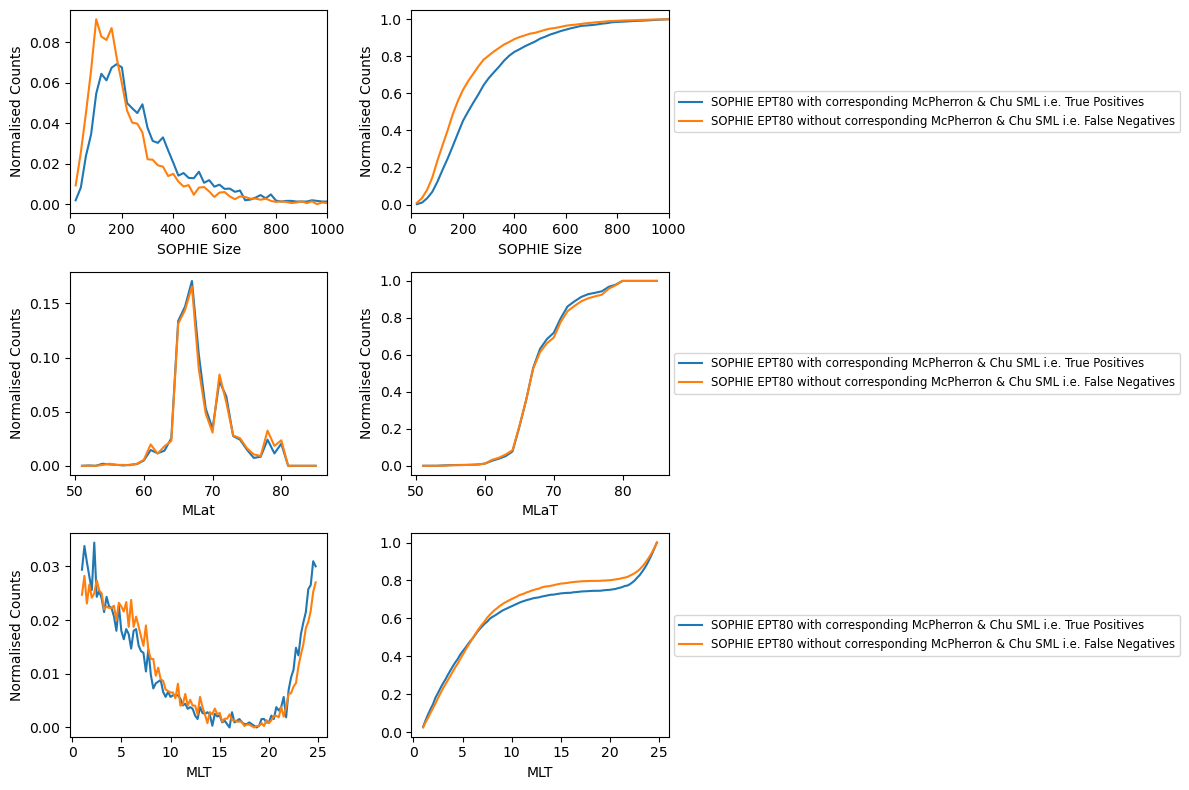

In [3]:
# %% Analysis & Plotting
result, comparison = distribution_producer(mcpsmldf, "McPherron & Chu SML")

fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(3, 2, figsize=(16, 12))

tp_counts = np.median(result["tp_size"], axis=0) / np.sum(
    np.median(result["tp_size"], axis=0)
)
fn_counts = np.median(result["fn_size"], axis=0) / np.sum(
    np.median(result["fn_size"], axis=0)
)
tp_csum = np.cumsum(tp_counts)
fn_csum = np.cumsum(fn_counts)

x_values = result["size_edges"][:-1] + np.diff(result["size_edges"])[0]

ax1.plot(
    x_values,
    tp_counts,
    label="SOPHIE EPT80 with corresponding {} i.e. True Positives".format(
        comparison
    ),
)
ax1.plot(
    x_values,
    fn_counts,
    label="SOPHIE EPT80 without corresponding {} i.e. False Negatives".format(
        comparison
    ),
)
ax1.set_xlim(0, 1000)
ax1.set_xlabel("SOPHIE Size")
ax1.set_ylabel("Normalised Counts")

ax4.plot(
    x_values,
    tp_csum,
    label="SOPHIE EPT80 with corresponding {} i.e. True Positives".format(
        comparison
    ),
)
ax4.plot(
    x_values,
    fn_csum,
    label="SOPHIE EPT80 without corresponding {} i.e. False Negatives".format(
        comparison
    ),
)

ax4.set_xlim(0, 1000)
ax4.set_xlabel("SOPHIE Size")
ax4.set_ylabel("Normalised Counts")
ax4.legend(bbox_to_anchor=(1, 0.5), loc="center left",fontsize='small')


tp_counts = np.median(result["tp_mlat"], axis=0) / np.sum(
    np.median(result["tp_mlat"], axis=0)
)
fn_counts = np.median(result["fn_mlat"], axis=0) / np.sum(
    np.median(result["fn_mlat"], axis=0)
)
tp_csum = np.cumsum(tp_counts)
fn_csum = np.cumsum(fn_counts)

x_values = result["mlat_edges"][:-1] + np.diff(result["mlat_edges"])[0]

ax2.plot(
    x_values,
    tp_counts,
    label="SOPHIE EPT80 with corresponding {} i.e. True Positives".format(
        comparison
    ),
)
ax2.plot(
    x_values,
    fn_counts,
    label="SOPHIE EPT80 without corresponding {} i.e. False Negatives".format(
        comparison
    ),
)
ax2.set_xlabel("MLat")
ax2.set_ylabel("Normalised Counts")

ax5.plot(
    x_values,
    tp_csum,
    label="SOPHIE EPT80 with corresponding {} i.e. True Positives".format(
        comparison
    ),
)
ax5.plot(
    x_values,
    fn_csum,
    label="SOPHIE EPT80 without corresponding {} i.e. False Negatives".format(
        comparison
    ),
)

ax5.set_xlabel("MLaT")
ax5.set_ylabel("Normalised Counts")
ax5.legend(bbox_to_anchor=(1, 0.5), loc="center left",fontsize='small')


tp_counts = np.median(result["tp_mlt"], axis=0) / np.sum(
    np.median(result["tp_mlt"], axis=0)
)
fn_counts = np.median(result["fn_mlt"], axis=0) / np.sum(
    np.median(result["fn_mlt"], axis=0)
)
tp_csum = np.cumsum(tp_counts)
fn_csum = np.cumsum(fn_counts)

x_values = result["mlt_edges"][:-1] + np.diff(result["mlat_edges"])[0]

ax3.plot(
    x_values,
    tp_counts,
    label="SOPHIE EPT80 with corresponding {} i.e. True Positives".format(
        comparison
    ),
)
ax3.plot(
    x_values,
    fn_counts,
    label="SOPHIE EPT80 without corresponding {} i.e. False Negatives".format(
        comparison
    ),
)
ax3.set_xlabel("MLT")
ax3.set_ylabel("Normalised Counts")

ax6.plot(
    x_values,
    tp_csum,
    label="SOPHIE EPT80 with corresponding {} i.e. True Positives".format(
        comparison
    ),
)
ax6.plot(
    x_values,
    fn_csum,
    label="SOPHIE EPT80 without corresponding {} i.e. False Negatives".format(
        comparison
    ),
)

ax6.set_xlabel("MLT")
ax5.set_ylabel("Normalised Counts")
ax6.legend(bbox_to_anchor=(1, 0.5), loc="center left",fontsize='small')

fig.tight_layout()
